<a href="https://colab.research.google.com/github/AMRITL-D/learning/blob/master/Assignment2_MSDATASCIENCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import gzip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=64eebca0049d5723f803a62d893d185e758814241b514e12fb5ef5337ca6420a
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [9]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=699dc58d78f2097a98a66c275b8a4d980ebf93a28e422408d57f3ed6c0a1872c
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [4]:
link_data='https://github.com/tulip-lab/sit742/raw/develop/Assessment/2024/data/transactionrecord.gz'

In [5]:
import wget


In [6]:
!wget -O transactionrecord.gz $link_data

--2024-09-22 13:25:00--  https://github.com/tulip-lab/sit742/raw/develop/Assessment/2024/data/transactionrecord.gz
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tulip-lab/sit742/develop/Assessment/2024/data/transactionrecord.gz [following]
--2024-09-22 13:25:01--  https://raw.githubusercontent.com/tulip-lab/sit742/develop/Assessment/2024/data/transactionrecord.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6986544 (6.7M) [application/octet-stream]
Saving to: ‘transactionrecord.gz’

transactionrecord.g 100%[===================>]   6.66M  17.3MB/s    in 0.4s    

2024-09-22 13:25:02 (17.3 

In [10]:
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

In [11]:
from pyspark.sql import SQLContext

sqlContext = SQLContext(sc)
sqlContext

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [12]:
df = sqlContext.read.format('csv') \
    .option('header', 'true') \
    .option('inferSchema', 'true') \
    .load('transactionrecord.gz')

In [13]:
df.show()

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11.53|      12|     13069|United Kingdom|
|       581475|12/9/2019|    23272|Tree T-Light Hold...|             0ca|10.65|      12|     13069|United Kingdom|
|       581475|12/9/2019|    23239|Set Of 4 Knick Kn...|             0ca|11.94|       6|     13069|United Kingdom|
|       581475|12/9/2019|    21705|Bag 500g Swirly M...|             0ca|10.65| 

In [14]:
df_custno=df.filter(df.CustomerNo.isNull())

In [15]:
df_custno.show()

+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+
|TransactionNo|Date|ProductNo|ProductName|Product_category|Price|Quantity|CustomerNo|Country|
+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+
+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+



In [16]:
df_CustNo_NA = df.filter(df.CustomerNo == "NA")
df_CustNo_NA.show()

+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+
|TransactionNo|Date|ProductNo|ProductName|Product_category|Price|Quantity|CustomerNo|Country|
+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+
+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+



In [17]:
df_CustNo_minusOne = df.filter(df.CustomerNo == "-1")
df_CustNo_minusOne.show()

+-------------+----------+---------+--------------------+----------------+-----+--------+----------+--------------+
|TransactionNo|      Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country|
+-------------+----------+---------+--------------------+----------------+-----+--------+----------+--------------+
|      C581406| 12/8/2019|   46000M|Polyester Filler ...|             0ca| 6.19|    -240|        -1|United Kingdom|
|      C581406| 12/8/2019|   46000S|Polyester Filler ...|             0ca| 6.19|    -300|        -1|United Kingdom|
|      C575153| 11/8/2019|    22947|Wooden Advent Cal...|             0ca|44.25|      -1|        -1|United Kingdom|
|      C574288| 11/3/2019|    22178|Victorian Glass H...|             0ca|25.37|      -1|        -1|United Kingdom|
|      C573180|10/28/2019|    23048|Set Of 10 Lantern...|             0ca| 14.5|      -1|        -1|United Kingdom|
|      C569495| 10/4/2019|    21843|Red Retrospot Cak...|             0c

In [18]:
# Replace 'NA' with '-1' in CustomerNo column
df_final = df.na.replace("NA", "-1", subset=["CustomerNo"])

### 1.1.2 Process the text in productName column, only alphabet characters left, and save the processed  result to a new column productName_process and show the first 5 rows.

In [19]:
from pyspark.sql.functions import regexp_replace, col
df_final=df_final.withColumn("productName_process", regexp_replace(col("productName"), "[^a-zA-Z ]", ""))
df_final.show(5)


+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country| productName_process|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|Set Of  Wooden Ma...|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|Christmas Star Wi...|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11.53|      12|     13069|United Kingdom|Storage Tin Vinta...|
|       581475|12/9/2019|    23272|Tree T-Light Hold...|             0ca|10.65|      12|     13069|United Kingdom|Tree TLight Holde...|
|       581475|12/9/2019|    23239|Set Of 4 Knic

# Question 1.2
Find out the revenue on each transaction date. In order to achieve the above, some wrangling work is required to be done:

### 1.2.1 Using pyspark to calculate the revenue (price * Quantity) and save as float format in pyspark dataframe to show the top 5 rows.

In [20]:
df_final = df_final.withColumn("revenue", (df_final["price"] * df_final["Quantity"]).cast("float"))
df_final.show(5)


+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+-------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country| productName_process|revenue|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+-------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|Set Of  Wooden Ma...| 257.64|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|Christmas Star Wi...|  383.4|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11.53|      12|     13069|United Kingdom|Storage Tin Vinta...| 138.36|
|       581475|12/9/2019|    23272|Tree T-Light Hold...|             0ca|10.65|      12|     13069|United Kingdom|Tree TLight Holde...| 

### 1.2.2 Transform the pyspark dataframe to pandas dataframe (named as df) and create the column transaction_date with date format according to Date. Print your df pandas dataframe with top 5 rows after creating the column transaction_date.

In [21]:
# Convert to pandas DataFrame
df_pd = df_final.toPandas()

# Create transaction_date column with date format
df_pd['transaction_date'] = pd.to_datetime(df_pd['Date'])

df_pd.head(20)

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,productName_process,revenue,transaction_date
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,0ca,21.47,12,17490,United Kingdom,Set Of Wooden Market Crates,257.640015,2019-12-09
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,0ca,10.65,36,13069,United Kingdom,Christmas Star Wish List Chalkboard,383.399994,2019-12-09
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,0ca,11.53,12,13069,United Kingdom,Storage Tin Vintage Leaf,138.360001,2019-12-09
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,0ca,10.65,12,13069,United Kingdom,Tree TLight Holder Willie Winkie,127.800003,2019-12-09
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,0ca,11.94,6,13069,United Kingdom,Set Of Knick Knack Tins Poppies,71.639999,2019-12-09
5,581475,12/9/2019,21705,Bag 500g Swirly Marbles,0ca,10.65,24,13069,United Kingdom,Bag g Swirly Marbles,255.600006,2019-12-09
6,581475,12/9/2019,22118,Joy Wooden Block Letters,0ca,11.53,18,13069,United Kingdom,Joy Wooden Block Letters,207.539993,2019-12-09
7,581475,12/9/2019,22119,Peace Wooden Block Letters,0ca,12.25,12,13069,United Kingdom,Peace Wooden Block Letters,147.000000,2019-12-09
8,581475,12/9/2019,22217,T-Light Holder Hanging Lace,0ca,10.65,12,13069,United Kingdom,TLight Holder Hanging Lace,127.800003,2019-12-09
9,581475,12/9/2019,22216,T-Light Holder White Lace,0ca,10.55,24,13069,United Kingdom,TLight Holder White Lace,253.199997,2019-12-09


### 1.2.3 Plot the sum of revenue on transaction_date in a line plot and find out any immediate pattern /insight?


<Axes: xlabel='transaction_date'>

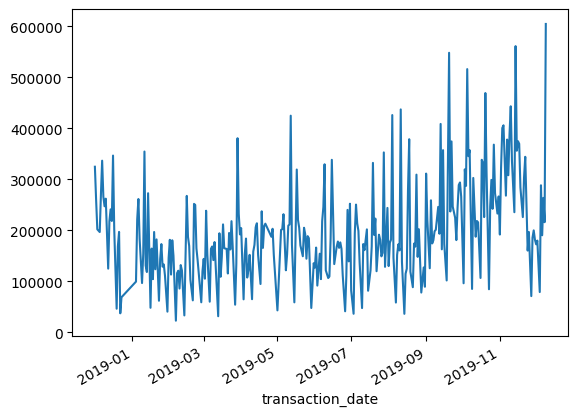

In [22]:
df_pd.groupby('transaction_date')['revenue'].sum().plot(kind='line')

# Question 1.3
Let’s continue to analyse on the transaction_date vs revenue.


1.3.1 Determine which workday (day of the week), generates the most sales (plotting the results in a
line chart with workday on averaged revenues).

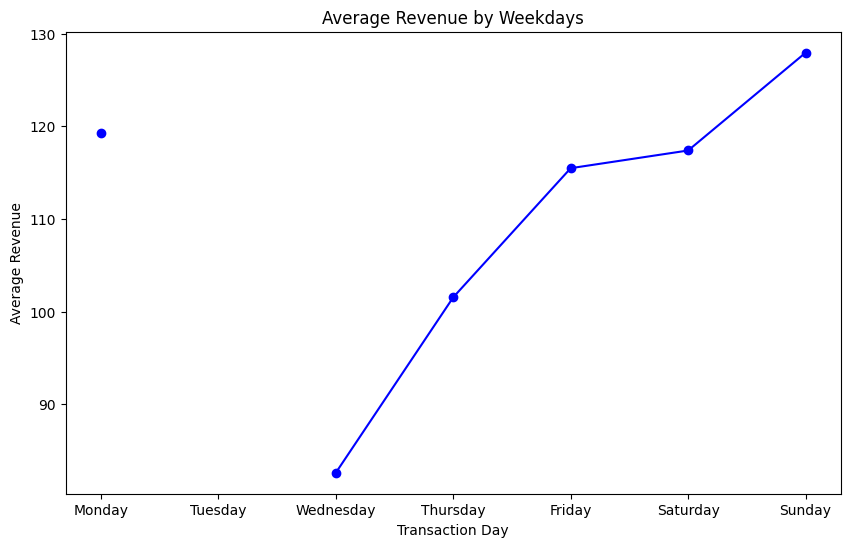

In [23]:
df_pd['day_of_week'] = df_pd['transaction_date'].dt.day_name()

# Group by 'day_of_week' and calculate the average revenue
avg_revenue_by_day = df_pd.groupby('day_of_week')['revenue'].mean()

# Ensure the days of the week are in the correct order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_revenue_by_day = avg_revenue_by_day.reindex(day_order)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(avg_revenue_by_day.index, avg_revenue_by_day.values, marker='o', linestyle='-', color='b')
plt.title('Average Revenue by Weekdays')
plt.xlabel('Transaction Day')
plt.ylabel('Average Revenue')
plt.show()

### 1.3.2 Identify the name of product (column roductName_process) that contributes the highest revenue on ‘that workday’ (you need to find out from 1.3.1) and the name of product (column productName_process) that has the highest sales volume (sum of the Quantity), no need to remove negative quantity transactions.) on ‘that workday’ (you need to find out from 1.3.1).

In [24]:
df_pd.groupby(['day_of_week', 'productName_process'])['revenue'].sum().sort_values(ascending=False)


day_of_week  productName_process               
Monday       Paper Craft Little Birdie             501359.062500
Sunday       World War  Gliders Asstd Designs      187081.343750
Monday       Popcorn Holder                        170091.062500
Sunday       Assorted Colour Bird Ornament         132705.609375
Friday       Cream Hanging Heart TLight Holder     129424.890625
                                                       ...      
             Paper Pocket Traveling Fan             -7228.410645
Thursday     Tea Time Party Bunting                 -8141.709961
Saturday     Pantry Chopping Board                 -10777.389648
Thursday     Herb Marker Basil                     -13132.450195
Sunday       Rotating Silver Angels TLight Hldr    -74126.367188
Name: revenue, Length: 19975, dtype: float32

### 1.3.3 Please provide two plots showing the top 5 products that contribute the highest revenues in general and top 5 products that have the highest sales volumes in general.

In [25]:
# Group by 'Product' and calculate the revenue
revenue_by_product = df_pd.groupby('productName_process')['revenue'].sum().sort_values(ascending=False)

<Axes: xlabel='productName_process'>

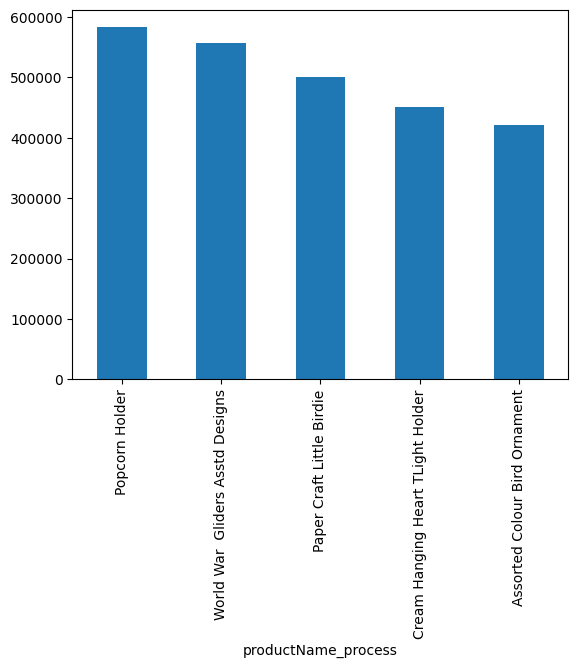

In [26]:
revenue_by_product.head(5).plot(kind='bar')

In [27]:
# Group by 'Product' and calculate the Sale Volume
Salevolume_by_product = df_pd.groupby('productName_process')['Quantity'].sum().sort_values(ascending=False)

<Axes: xlabel='productName_process'>

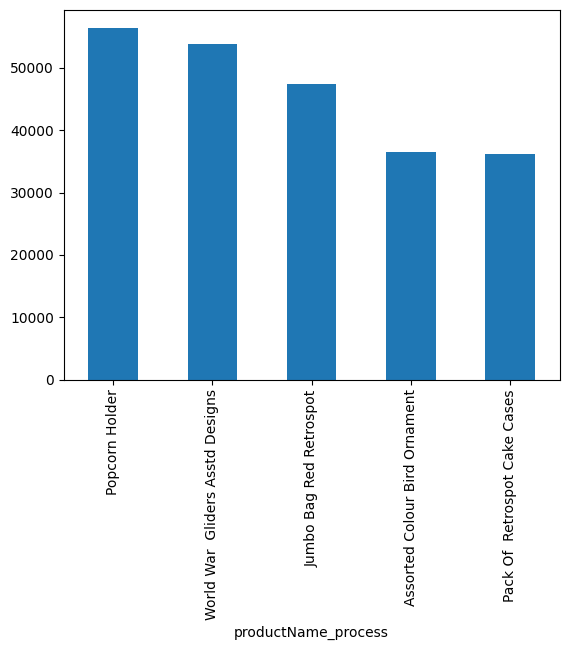

In [28]:
Salevolume_by_product.head(5).plot(kind='bar')

# Question 1.4
Which country generates the highest revenue? Additionally, identify the month in that country that has the highest
 revenue.

In [29]:
# Group by 'country' and calculate the total  revenue
revenue_by_country = df_pd.groupby('Country')['revenue'].sum()

In [30]:
revenue_by_country.head().sort_values(ascending=False)

,revenue
Country,
Australia,988756.375000
Belgium,271346.968750
Austria,68548.296875
Brazil,4652.270020
Bahrain,3226.859863


In [32]:
#create the Month number from transection_date
df_pd['month'] = df_pd['transaction_date'].dt.month_name()

In [33]:
df_pd

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,productName_process,revenue,transaction_date,day_of_week,month
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,0ca,21.47,12,17490,United Kingdom,Set Of Wooden Market Crates,257.640015,2019-12-09,Monday,December
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,0ca,10.65,36,13069,United Kingdom,Christmas Star Wish List Chalkboard,383.399994,2019-12-09,Monday,December
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,0ca,11.53,12,13069,United Kingdom,Storage Tin Vintage Leaf,138.360001,2019-12-09,Monday,December
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,0ca,10.65,12,13069,United Kingdom,Tree TLight Holder Willie Winkie,127.800003,2019-12-09,Monday,December
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,0ca,11.94,6,13069,United Kingdom,Set Of Knick Knack Tins Poppies,71.639999,2019-12-09,Monday,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,0ca,18.96,-2,12472,Germany,Organiser Wood Antique White,-37.919998,2018-12-01,Saturday,December
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,0ca,14.09,-3,12472,Germany,Red Spotty Biscuit Tin,-42.270000,2018-12-01,Saturday,December
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,0ca,11.74,-1,12472,Germany,Porcelain Hanging Bell Small,-11.740000,2018-12-01,Saturday,December
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,0ca,16.35,-4,12472,Germany,Advent Calendar Gingham Sack,-65.400002,2018-12-01,Saturday,December


In [34]:
 #Ensure the days of the week are in the correct order
revenue_by_month=df_pd.groupby('month')['revenue'].sum()
month_order = ['january', 'february', 'march', 'april', 'may', 'june', 'july','august','september','october','november','december']
revenue_by_month = revenue_by_month.reindex(month_order)

In [35]:
# Group by 'month' and calculate the total  revenue
revenue_by_Country_month = df_pd.groupby(['Country','month'])['revenue'].sum()


In [36]:
revenue_by_Country_month.head(15)

Country    month    
Australia  April           275.760010
           August       142054.265625
           December       5562.509766
           February     104732.304688
           January       77464.812500
           July          57857.941406
           June         186819.656250
           March        122370.398438
           May          106730.679688
           November      46151.859375
           October       92984.453125
           September     45751.730469
Austria    August         9300.459961
           December        230.159973
           July           6795.959961
Name: revenue, dtype: float32

# Question 1.5
Let’s do some analysis on the CustomerNo and their transactions. Determine the shopping frequency of
customers to identify who shops most frequently (find out the highest distinct count of transactionNo
on customer level, be careful with those transactions that is not for shopping – filter those transaction
quantity <= 0). Also, find out what products (column productName_process) ‘this customer’ typically
buys based on the Quantity of products purchased.

In [37]:
#step1 filter the transcetion having vlue more than 0
filter_df=df_pd[df_pd['Quantity']>0]

In [38]:
customer_frequency = filter_df.groupby('CustomerNo')['TransactionNo'].nunique().reset_index()
customer_frequency.columns = ['CustomerNo', 'distinct_transaction_count']

In [40]:
customer_frequency

,CustomerNo,distinct_transaction_count
0,-1,1
1,12004,1
2,12006,1
3,12008,1
4,12013,1
...,...,...
4714,18280,1
4715,18281,1
4716,18282,2
4717,18283,16


In [41]:
# Step 3: Identify the customer with the highest distinct transaction count
top_customer = customer_frequency.loc[customer_frequency['distinct_transaction_count'].idxmax()]

In [42]:
top_customer

,409
CustomerNo,12748
distinct_transaction_count,207


In [43]:
# Step 4: Find typical products purchased by the top customer based on quantity
top_customer_products = filter_df[filter_df['CustomerNo'] == top_customer['CustomerNo']]
product_summary = top_customer_products.groupby('productName_process')['Quantity'].sum().reset_index()

In [44]:
# Sort products by total quantity purchased
product_summary = product_summary.sort_values(by='Quantity', ascending=False)

In [ ]:
# Display the results
print("Top Customer:", top_customer['CustomerNo'])
print("Distinct Transaction Count:", top_customer['distinct_transaction_count'])
print("Typical Products Purchased:")
print(product_summary)

# Question 1.6
As the data scientist, you would like to build a basket-level analysis on the product customer buying (filter the ‘df’ dataframe with df[’Quantity’]>0). In this task, you need to:


### 1.6.1 Group by the transactionNo and aggregate the category of product (column product_category) into list on transactionNo level. Similarly, group and aggregate name of product (column productName_process) into list on transactionNo level

In [45]:
Transectionsummary=filter_df.groupby('TransactionNo').agg({'Product_category': lambda x: list(x), 'productName_process': lambda x: list(x)})

In [46]:
df_tr=Transectionsummary.copy()

In [47]:
df_tr

,Product_category,productName_process
TransactionNo,,
536365,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca]","[Cream Hanging Heart TLight Holder, White Moro..."
536366,"[0ca, 0ca]","[Hand Warmer Union Jack, Hand Warmer Red Retro..."
536367,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[Assorted Colour Bird Ornament, Poppys Playhou..."
536368,"[0ca, 0ca, 0ca, 0ca]","[Jam Making Set With Jars, Red Coat Rack Paris..."
536369,[0ca],[Bath Building Block Word]
...,...,...
581583,"[0ca, 0ca]","[ Chocolate Love Heart TLights, Lunch Bag Red ..."
581584,"[0ca, 0ca]","[Red Flock Love Heart Photo Frame, Chocolate ..."
581585,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[Black Tea Towel Classic Design, Assorted Bott..."


In [48]:
print(Transectionsummary)

                                                Product_category  \
TransactionNo                                                      
536365                       [0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca]   
536366                                                [0ca, 0ca]   
536367         [0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...   
536368                                      [0ca, 0ca, 0ca, 0ca]   
536369                                                     [0ca]   
...                                                          ...   
581583                                                [0ca, 0ca]   
581584                                                [0ca, 0ca]   
581585         [0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...   
581586                                      [0ca, 0ca, 0ca, 0ca]   
581587         [0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...   

                                             productName_process  
TransactionNo                                   

### 1.6.2 Removing duplicates on adjacent elements in the list from product_category you obtained from 1.6.1, such as [product category 1, product category 1, product category 2, ...] will be processed as [product category 1, product category 2,....]. After this processing, there will be no duplicates on on adjacent elements in the list. Please save your processed dataframe as ‘df_1’ and print the top 10 rows.

In [49]:
# Assuming Transectionsummary is your original DataFrame
def remove_adjacent_duplicates(lst):
    """Remove adjacent duplicates from a list."""
    return [x for i, x in enumerate(lst) if i == 0 or x != lst[i - 1]]

# Apply the function to the Product_category column
Transectionsummary['Product_category_updated'] = Transectionsummary['Product_category'].apply(remove_adjacent_duplicates)
Transectionsummary['productName_process_updated'] = Transectionsummary['productName_process'].apply(remove_adjacent_duplicates)



In [50]:
# Save the processed DataFrame as df_1
df_1 = Transectionsummary.copy()
df_1.head(10)

,Product_category,productName_process,Product_category_updated,productName_process_updated
TransactionNo,,,,
536365,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca]","[Cream Hanging Heart TLight Holder, White Moro...",[0ca],"[Cream Hanging Heart TLight Holder, White Moro..."
536366,"[0ca, 0ca]","[Hand Warmer Union Jack, Hand Warmer Red Retro...",[0ca],"[Hand Warmer Union Jack, Hand Warmer Red Retro..."
536367,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[Assorted Colour Bird Ornament, Poppys Playhou...",[0ca],"[Assorted Colour Bird Ornament, Poppys Playhou..."
536368,"[0ca, 0ca, 0ca, 0ca]","[Jam Making Set With Jars, Red Coat Rack Paris...",[0ca],"[Jam Making Set With Jars, Red Coat Rack Paris..."
536369,[0ca],[Bath Building Block Word],[0ca],[Bath Building Block Word]
536370,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[Alarm Clock Bakelike Pink, Alarm Clock Bakeli...",[0ca],"[Alarm Clock Bakelike Pink, Alarm Clock Bakeli..."
536371,[0ca],[Paper Chain Kit S Christmas],[0ca],[Paper Chain Kit S Christmas]
536372,"[0ca, 0ca]","[Hand Warmer Red Retrospot, Hand Warmer Union ...",[0ca],"[Hand Warmer Red Retrospot, Hand Warmer Union ..."
536373,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[Cream Hanging Heart TLight Holder, White Moro...",[0ca],"[Cream Hanging Heart TLight Holder, White Moro..."


# Question 1.7
Continue work on the results of question 1.6, now for each of the transaction, you will have a list of product categories. To further conduct the analysis, you need to finish below by using dataframe ‘df_1’:

1.7.1 Create new column prod_len to find out the length of the list from product_category on each transaction. Print the first five rows of dataframe ‘df_1’.


In [51]:
def count_product_categories(lst):
    return len(lst)
df_1['prod_len'] = df_1['Product_category_updated'].apply(count_product_categories)




In [52]:
df_1.head(5)

,Product_category,productName_process,Product_category_updated,productName_process_updated,prod_len
TransactionNo,,,,,
536365,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca]","[Cream Hanging Heart TLight Holder, White Moro...",[0ca],"[Cream Hanging Heart TLight Holder, White Moro...",1
536366,"[0ca, 0ca]","[Hand Warmer Union Jack, Hand Warmer Red Retro...",[0ca],"[Hand Warmer Union Jack, Hand Warmer Red Retro...",1
536367,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[Assorted Colour Bird Ornament, Poppys Playhou...",[0ca],"[Assorted Colour Bird Ornament, Poppys Playhou...",1
536368,"[0ca, 0ca, 0ca, 0ca]","[Jam Making Set With Jars, Red Coat Rack Paris...",[0ca],"[Jam Making Set With Jars, Red Coat Rack Paris...",1
536369,[0ca],[Bath Building Block Word],[0ca],[Bath Building Block Word],1


### 1.7.2 Transform the list in product_category from [productcategory1, productcategory2...] to ‘start > productcategory1 > productcategory2 > ... > conversion’ with new column path. You need to add ‘start’ as the first element, and ‘conversion’ as the last. Also you need to use ‘ > ’ to connect each of the transition on products (there is a space between the elements and the transition symbol >). The final format after the transition is given in example as below fig. 2. Define the function data_processing to achieve above with three arguments: df which is the dataframe name,maxlength with default value of 3 for filtering the dataframe with prod_len" <=maxlength and minlength with default value of 1 for iltering the dataframe with prod_len >=minlength. The function data_processing will return the new dataframe ‘df_2’. Run your defined function with dataframe ‘df_1’, maxlength = 5 and minlength = 2, print the dataframe ‘df_2’ with top 10 rows.

In [53]:
def transform_path(lst):
        if len(lst) > 0:
            return 'start > ' + ' > '.join(lst) + ' > conversion'
        return 'start > conversion'
 # Apply the transformation to create the 'path' column
df_1['path'] = df_1['Product_category'].apply(transform_path)


In [54]:
df_1.head(10)


,Product_category,productName_process,Product_category_updated,productName_process_updated,prod_len,path
TransactionNo,,,,,,
536365,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca]","[Cream Hanging Heart TLight Holder, White Moro...",[0ca],"[Cream Hanging Heart TLight Holder, White Moro...",1,start > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0c...
536366,"[0ca, 0ca]","[Hand Warmer Union Jack, Hand Warmer Red Retro...",[0ca],"[Hand Warmer Union Jack, Hand Warmer Red Retro...",1,start > 0ca > 0ca > conversion
536367,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[Assorted Colour Bird Ornament, Poppys Playhou...",[0ca],"[Assorted Colour Bird Ornament, Poppys Playhou...",1,start > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0c...
536368,"[0ca, 0ca, 0ca, 0ca]","[Jam Making Set With Jars, Red Coat Rack Paris...",[0ca],"[Jam Making Set With Jars, Red Coat Rack Paris...",1,start > 0ca > 0ca > 0ca > 0ca > conversion
536369,[0ca],[Bath Building Block Word],[0ca],[Bath Building Block Word],1,start > 0ca > conversion
536370,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[Alarm Clock Bakelike Pink, Alarm Clock Bakeli...",[0ca],"[Alarm Clock Bakelike Pink, Alarm Clock Bakeli...",1,start > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0c...
536371,[0ca],[Paper Chain Kit S Christmas],[0ca],[Paper Chain Kit S Christmas],1,start > 0ca > conversion
536372,"[0ca, 0ca]","[Hand Warmer Red Retrospot, Hand Warmer Union ...",[0ca],"[Hand Warmer Red Retrospot, Hand Warmer Union ...",1,start > 0ca > 0ca > conversion
536373,"[0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...","[Cream Hanging Heart TLight Holder, White Moro...",[0ca],"[Cream Hanging Heart TLight Holder, White Moro...",1,start > 0ca > 0ca > 0ca > 0ca > 0ca > 0ca > 0c...


# Question 1.8
Continue to work on the results of question 1.7, the dataframe ‘df_2’, we would like to build thetransition matrix together, but before we actually conduct the programming, we will need to finish few questions for exploration:

### 1.8.1 Check on your transaction level basket with results from question 1.7, could you please find outrespectively how many transactions ended with pattern ‘... > 0ca > onversion’ / ‘...> 1ca > conversion’ / ‘... > 2ca > conversion’ / ‘... > 3ca > conversion’ / ‘... > 4ca > conversion’ (1 result for each pattern, total 5 results are expected).

In [ ]:
trasection_level=[]
for in len(df_1['path']):
    if path.endswith('0ca > conversion'):
        trasection_level.append